# Daftar Isi

- [Daftar Isi](#daftar_isi)
- [Pendahuluan](#pendahuluan)
- [Pengantar Proyek](#pengantar_proyek)
- [Tujuan Proyek](#tujuan_proyek)
- [Tahapan Proyek](#tahapan_proyek)
- [Memuat seluruh Library dan Membaca filenya](#1)
- [Pra-Pemrosesan Data](#2)
- [Analisis Data](#3)
    - [Pelajari dan periksa datanya](#31)
    - [Pelajari corong peristiwanya](#32)
    - [Pelajari hasil eksperimen Anda](#33)
- [Kesimpulan](#4)

# Pendahuluan

Setiap kali kita melakukan penelitian, kita memerlukan analisa secara menyeluruh dengan seksama. Untuk membuat keputusan yang tepat, sebuah bisnis harus dapat memahami apakah analisa yang dibuatnya benar atau tidak.

Dalam proyek ini, mencari tahu tentang perilaku pengguna aplikasi pada perusahaan starup yang fokus menjual produk makanan. Para web designer ingin mengubah font untuk keseluruhan aplikasi, tetapi para manajer merasa khawatir jika para pengguna akan merasa bahwa desain baru tersebut justru mengganggu. Mereka pun memutuskan untuk mengambil keputusan berdasarkan hasil A/A/B testing.

Para pengguna dibagi menjadi tiga kelompok: dua kelompok kontrol diperlihatkan dengan versi font lama dan satu kelompok uji diperlihatkan dengan versi font baru. Temukan font manakah yang akan memberi hasil terbaik.

Membuat dua kelompok A (kontrol) memang memberikan keuntungan tertentu. Kita bisa menetapkan aturan bahwa keakuratan pengujian hanya akan diterima jika kedua kelompok kontrol memberikan hasil yang serupa. Jika terdapat perbedaan yang signifikan di antara kedua kelompok A, hal ini dapat membantu kita untuk mengidentifikasi faktor-faktor yang mungkin mendistorsi hasil yang kita peroleh. Membandingkan kelompok kontrol juga akan memberikan kita gambaran terkait berapa lama waktu dan data yang diperlukan saat menjalankan proses selanjutnya.

# Pengantar Proyek

Anda bekerja di sebuah startup yang menjual produk makanan. Anda perlu mencari tahu perilaku pengguna aplikasi dari perusahaan tersebut.

Pertama-tama, cobalah untuk mempelajari terlebih dahulu corong penjualannya. Temukan bagaimana pengguna bisa mencapai tahap pembelian. Berapa banyak pengguna yang benar-benar berhasil mencapai tahap pembelian? Berapa banyak pengguna yang terhenti pada tahap sebelumnya? Pada tahap manakah itu?

Kemudian, lihatlah hasil dari A/A/B testing (Baca terus untuk mengetahui informasi lebih lanjut tentang A/A/B testing). Para web designer ingin mengubah font untuk keseluruhan aplikasi, tetapi para manajer merasa khawatir jika para pengguna akan merasa bahwa desain baru tersebut justru mengganggu. Mereka pun memutuskan untuk mengambil keputusan berdasarkan hasil A/A/B testing.

Para pengguna dibagi menjadi tiga kelompok: dua kelompok kontrol diperlihatkan dengan versi font lama dan satu kelompok uji diperlihatkan dengan versi font baru. Temukan font manakah yang akan memberi hasil terbaik.

Membuat dua kelompok A (kontrol) memang memberikan keuntungan tertentu. Kita bisa menetapkan aturan bahwa keakuratan pengujian hanya akan diterima jika kedua kelompok kontrol memberikan hasil yang serupa. Jika terdapat perbedaan yang signifikan di antara kedua kelompok A, hal ini dapat membantu kita untuk mengidentifikasi faktor-faktor yang mungkin mendistorsi hasil yang kita peroleh. Membandingkan kelompok kontrol juga akan memberikan kita gambaran terkait berapa lama waktu dan data yang diperlukan saat menjalankan proses selanjutnya.

Anda akan menggunakan dataset yang sama untuk melakukan analisis reguler dan untuk melakukan analisis A/A/B. Pada proyek dunia nyata, eksperimen seperti ini dilakukan secara rutin. Analis mempelajari kualitas aplikasi dengan data umum, tanpa memperhatikan apakah pengguna berpartisipasi dalam eksperimen atau tidak.

# Tujuan Proyek

Ingin meningkatkan penjualan produk makanan dengan menggunakan font untuk keseluruhan aplikasi.

# Tahapan Proyek

Ada file yang akan dianalisa, yaitu `/datasets/logs_exp_us.csv` dengan format:
- `EventName` — nama peristiwa
- `DeviceIDHash` — ID unik pengguna
- `EventTimestamp` — waktu peristiwa
- `ExpId` — jumlah eksperimen: 246 dan 247 adalah kelompok kontrol, 248 adalah kelompok uji

Lalu melakukan pra-pemrosesan data sebelum dianalisa, setelah itu maka akan langsung di analisa beberap poin, yaitu:
- Mempelajari, Periksa dan Analisa datanya
- Mempelajari, Periksa dan Analisa peristiwanya
- Mempelajari, Periksa, Analisa dan Uji data serta menjelaskan hasil dari uji eksperimen data dan peristiwanya

## Memuat seluruh Library dan Membaca filenya

In [ ]:
# Membuat semua Libary
import pandas as pd, numpy as np
# Memuat Data Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
# Membuat Uji Statistik
import scipy.stats as st
import math
# Menyembunyikan warning
import warnings

In [ ]:
# Membuat set kolom untuk kolom bisa dibaca jika panjang
pd.set_option('display.max_columns', 100)
# Membuat warning untuk di abaikan dan disembunyikan
warnings.filterwarnings('ignore')

In [ ]:
# Memuat file tabel tindakan pengguna atau suatu peristiwa
df_logs = pd.read_csv('/datasets/logs_exp_us.csv', delimiter='\t')

In [ ]:
df_logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


**Deskripsi Data**

Tabel tindakan pengguna atau suatu peristiwa:

- `EventName` — nama peristiwa
- `DeviceIDHash` — ID unik pengguna
- `EventTimestamp` — waktu peristiwa
- `ExpId` — jumlah eksperimen: 246 dan 247 adalah kelompok kontrol, 248 adalah kelompok uji

In [ ]:
# Melihat informasi keseluruhan pada tabel tindakan pengguna atau suatu peristiwa
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [ ]:
# Melihat nilai yang hilang pada tabel tindakan pengguna atau suatu peristiwa
df_logs.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel tindakan pengguna atau suatu peristiwa
df_logs.duplicated().sum()

413

Setelah melihat dan menganalisa tabel tindakan pengguna atau suatu peristiwa, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Mempunyai masalah untuk nama kolom karena kapital dan tidak pemisahnya.
- Mempunyai masalah untuk nilai duplikasi tetapi perlu analisa lebih lanjut apakah benar-benar duplikasi atau tidak.
- Mempunyai masalah untuk tipe data pada kolom `EventTimeStamp` yang perlu di konversi menjadi waktu.
- Tidak mempunyai masalah untuk nilai yang hilang. 

## Pra-Pemrosesan Data

Sebelum tahap menganalisa, sebaiknya memperbaiki semua masalah pada tabel tindakan pengguna atau suatu peristiwa. Karena ada beberapa masalah yang nanti akan berdampak pada proses analisanya.

In [ ]:
# Melihat nilai duplikasi pada tabel tindakan pengguna atau suatu peristiwa
df_logs[df_logs.duplicated()]

,EventName,DeviceIDHash,EventTimestamp,ExpId
453,MainScreenAppear,5613408041324010552,1564474784,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3573,MainScreenAppear,434103746454591587,1564628377,248
4076,MainScreenAppear,3761373764179762633,1564631266,247
4803,MainScreenAppear,2835328739789306622,1564634641,248
...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,1565206004,247
242332,PaymentScreenSuccessful,4718002964983105693,1565206005,247
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242362,CartScreenAppear,2382591782303281935,1565206049,246


Sepertinya untuk baris-baris ini tidak termasuk kategori duplikasi, kita contohkan saja pada baris `242360` dan `242362` bahwa jenis device berdasarkan id, waktu kejadian sama. Mungkin kita bisa berpikir kalau sebenarnya user ini ada yang tertinggal dengan barang yang ingin di beli setelah melakukan pembayaran, jadi dia balik lagi ke menu cart dengan catatan waktu hanya sepersekian milidetik setelah pembayaran sukses dilakukan.

Intinya, bahwa mungkin user-user ini melakukan perpindahan halaman dari satu ke halaman lainnya dengan waktu yang sangat singkat. Sehingga kita menyatakan bahwa data ini tidak duplikasi dan akan dibiarkan begitu saja.

In [ ]:
# mengganti nama kolom pada tabel tindakan pengguna atau suatu peristiwa
df_logs.columns = ['event_name', 'device_id_hash', 'event_time_stamp', 'exp_id']

In [ ]:
# melihat hasilnya
df_logs.head()

,event_name,device_id_hash,event_time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Untuk tahap selanjutnya yaitu mengkonversi waktu pada kolom `event_time_stamp` ke datetime tetapi tidak mengubah tipe kolom melainkan dengan membuat kolom baru untuk konversinya, lalu membuat kolom untuk membuat tanggal dan waktunya.

In [ ]:
# Membuat kolom baru untuk mengkonversi kolom event_time_stamp ke datetime
df_logs['event_datetime_stamp'] = pd.to_datetime(df_logs['event_time_stamp'], unit='s')

In [ ]:
# Membuat kolom baru untuk mengidentifikasi tanggal dan waktu secara terpisah
df_logs['event_date'] = df_logs['event_datetime_stamp'].dt.date

In [ ]:
# Mengkonversi kolom event_date dan event_time ke datetime
df_logs['event_date'] = pd.to_datetime(df_logs['event_date'], format='%Y-%m-%d')

In [ ]:
# melihat hasilnya
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   event_name            244126 non-null  object        
 1   device_id_hash        244126 non-null  int64         
 2   event_time_stamp      244126 non-null  int64         
 3   exp_id                244126 non-null  int64         
 4   event_datetime_stamp  244126 non-null  datetime64[ns]
 5   event_date            244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


In [ ]:
# melihat hasilnya
df_logs.head()

,event_name,device_id_hash,event_time_stamp,exp_id,event_datetime_stamp,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


Semua perbaikan data yang dibutuhkan sudah dilakukan, sekarang tinggal melakukan tahap selanjutnya yaitu analisis data untuk menjawab permasalahan ini.

## Analisis Data

### Pelajari dan periksa datanya

- Berapa banyak peristiwa yang ada dalam log?
- Berapa banyak pengguna yang ada dalam log?
- Berapa jumlah rata-rata peristiwa per pengguna?
- Periode waktu manakah yang dicakup oleh data? Temukan tanggal maksimum dan minimumnya. Buatlah sebuah histogram berdasarkan tanggal dan waktu. Bisakah Anda memastikan bahwa data yang Anda miliki sama lengkapnya untuk seluruh periode? Peristiwa terdahulu bisa saja muncul dalam log beberapa pengguna karena alasan teknis, dan ini bisa mengacaukan gambaran secara keseluruhan. Temukan momen ketika data mulai dirasa lengkap dan abaikan data lama tersebut. Periode manakah yang benar-benar diwakili oleh data tersebut?
- Apakah Anda kehilangan banyak peristiwa dan pengguna saat menyingkirkan data lama?
- Pastikan Anda memiliki pengguna dari ketiga kelompok eksperimen.

# Berapa banyak peristiwa yang ada dalam log?

In [ ]:
# Berapa banyak peristiwa yang ada dalam log?

print('Jenis Peristiwa dalam tindakan pengguna atau suatu peristiwa yaitu:', df_logs['event_name'].unique())
print()
print('Jumlah peristiwa dalam tindakan pengguna atau suatu peristiwa sebanyak', df_logs['device_id_hash'].count(), 'kejadian.')

Jenis Peristiwa dalam tindakan pengguna atau suatu peristiwa yaitu: ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']

Jumlah peristiwa dalam tindakan pengguna atau suatu peristiwa sebanyak 244126 kejadian.


# Berapa banyak pengguna yang ada dalam log?

In [ ]:
# Berapa banyak pengguna yang ada dalam log?

print('Banyak pengguna yang ada didalam log yaitu sebanyak', len(df_logs['device_id_hash'].unique()), 'pengguna.')

Banyak pengguna yang ada didalam log yaitu sebanyak 7551 pengguna.


# Berapa jumlah rata-rata peristiwa per pengguna?

In [ ]:
# Berapa jumlah rata-rata peristiwa per pengguna?

print('Jumlah rata-rata peristiwa per-pengguna adalah {0:.0f} peristiwa per-pengguna'.format(df_logs['device_id_hash'].count() / len(df_logs['device_id_hash'].unique())))

Jumlah rata-rata peristiwa per-pengguna adalah 32 peristiwa per-pengguna


# Periode waktu manakah yang dicakup oleh data? Temukan tanggal maksimum dan minimumnya.

In [ ]:
# Periode waktu manakah yang dicakup oleh data? Temukan tanggal maksimum dan minimumnya.

print('Tanggal minimum dan maksimumnya yaitu:', df_logs['event_date'].min(), 'dan', df_logs['event_date'].max())

Tanggal minimum dan maksimumnya yaitu: 2019-07-25 00:00:00 dan 2019-08-07 00:00:00


# Buatlah sebuah histogram berdasarkan tanggal dan waktu. Bisakah Anda memastikan bahwa data yang Anda miliki sama lengkapnya untuk seluruh periode? Peristiwa terdahulu bisa saja muncul dalam log beberapa pengguna karena alasan teknis, dan ini bisa mengacaukan gambaran secara keseluruhan. Temukan momen ketika data mulai dirasa lengkap dan abaikan data lama tersebut. Periode manakah yang benar-benar diwakili oleh data tersebut?

In [ ]:
# Memfilter untuk melihat pengguna pada setiap tanggal selama periode berlangsung
event_time_pivot = df_logs.pivot_table(index='event_date', values='device_id_hash', aggfunc='count').reset_index()
event_time_pivot

,event_date,device_id_hash
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,413
6,2019-07-31,2031
7,2019-08-01,36229
8,2019-08-02,35606
9,2019-08-03,33351


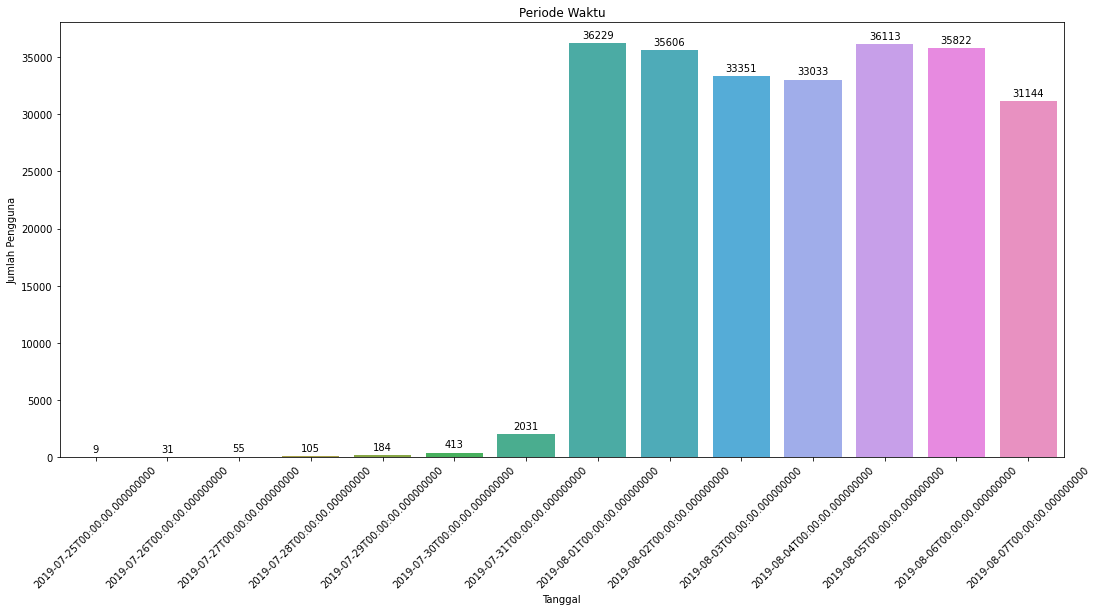

In [ ]:
# Membuat histogram berdasarkan tanggal dan waktu
# Membuat ukuran grafiknya
plt.figure(figsize=(18,8))
# Membuat barplot dengan seaborn
ax = sns.barplot(data=event_time_pivot,
                 x='event_date',
                 y='device_id_hash')
# Menambahkan label untuk X, Y, dan Judul Grafik
plt.title('Periode Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
# Membuat tampilan untuk angka berdasarkan barplot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
# label untuk X dibuat miring 45 derajat
for item in ax.get_xticklabels():
    item.set_rotation(45)
# Menampilkan grafik    
plt.show()

Kesimpulan:

Setelah menganalisa jumlah pengguna berdasarkan tanggal dan membuat grafiknya bahwa pengguna pada tanggal 25 Agustus 2019 sampai 31 Agustus 2019 penggunanya sangatlah sedikit dibanding dengan pengguna pada tanggal 1 September 2019 sampai 7 Septermber 2019. Ada kemungkinan data ini mempunyai kesalahan teknis dalam penginputannya atau terjadi error atau bug. Periode yang dimana data sudah mulai stabil yaitu pada tanggal 1 September 2019 sampai 7 Septermber 2019 akan menjadi acuan untuk analisa pada tahap selanjutnya.

# Apakah Anda kehilangan banyak peristiwa dan pengguna saat menyingkirkan data lama?

Karena untuk melakukan analisa lebih lanjut dan uji hipotesis, maka perlu memisahkan masing-masing data berdasarkan data yang error atau bug dan data yang sudah mulai stabil dengan variabel baru. Masing-masing varibel tersebut akan punya kegunaannya tersendiri.

In [ ]:
# Apakah Anda kehilangan banyak peristiwa dan pengguna saat menyingkirkan data lama?

# Membuat variabel untuk periode yang data penggunanya mulai stabil
new_period = df_logs.query('event_date > "2019-07-31"')
# Membuat variabel untuk periode yang data penggunanya ada kesalah teknis/error/bug
old_period = df_logs.query('event_date < "2019-08-01"')
# Membuat variabel untuk menghitung jumlah user secara keseluruhan
total_users = df_logs['device_id_hash'].nunique()
# Membuat variabel untuk menghitung jumlah kejadian secara keseluran
total_events = df_logs['event_name'].count()
# Membuat variabel untuk menghitung jumlah user yang sudah di filter dari new_period
new_users = new_period['device_id_hash'].nunique()
# Membuat variabel untuk menghitung jumlah kejadian yang sudah di filter dari new_period 
new_events = new_period['event_name'].count()

In [ ]:
# Apakah Anda kehilangan banyak peristiwa dan pengguna saat menyingkirkan data lama?
# jumlah kehilangan pengguna dan presentasenya
print('Jumlah kehilangan pengguna setelah menyingkirkan data lama sebesar {} pengguna.'.format((total_users - new_users)))
print('Jumlah presentase kehilangan pengguna setelah menyingkirkan data lama sebesar {0:.2f} persen.'.format(((total_users - new_users) / total_users) * 100))
print()
# jumlah kehilangan peristiwa dan presentasenya
print('Jumlah kehilangan peristiwa setelah menyingkirkan data lama sebesar {} peristiwa.'.format((total_events - new_events)))
print('Jumlah presentase kehilangan pengguna setelah menyingkirkan data lama sebesar {0:.2f} persen.'.format(((total_events - new_events) / total_events) * 100))

Jumlah kehilangan pengguna setelah menyingkirkan data lama sebesar 17 pengguna.
Jumlah presentase kehilangan pengguna setelah menyingkirkan data lama sebesar 0.23 persen.

Jumlah kehilangan peristiwa setelah menyingkirkan data lama sebesar 2828 peristiwa.
Jumlah presentase kehilangan pengguna setelah menyingkirkan data lama sebesar 1.16 persen.


Jumlah kehilangan pengguna dan peristiwa setelah data difilter yang penggunanya mulai stabil berdasarkan tanggal tidak begitu banyak kehilangan, jadi data yang sudah difilter aman untuk dilanjutkan proses analisa berikutnya.

# Pastikan Anda memiliki pengguna dari ketiga kelompok eksperimen.

In [ ]:
# Pastikan Anda memiliki pengguna dari ketiga kelompok eksperimen.
# new_users

exp_new_users = new_period.groupby('exp_id')['device_id_hash'].nunique().reset_index()
exp_new_users.columns = ['exp_id', 'total_pengguna']
exp_new_users

,exp_id,total_pengguna
0,246,2484
1,247,2513
2,248,2537


Bahwa setelah identifikasi kelompok eksperimen berdasarkan pengguna untuk ketiga kelompok tidak ada yang hilang dan total penggunanya tidak ada gap yang jauh atau perbandingna pengguna yang sangat berbeda untuk dilakukan eksperimen pada tahap selanjutnya.

### Pelajari corong peristiwanya

- Lihat peristiwa apa saja yang ada dalam log dan berapa banyak frekuensi kemunculannya. Urutkan peristiwa tersebut berdasarkan frekuensi.
- Temukan jumlah pengguna yang melakukan setiap tindakan. Urutkan peristiwa berdasarkan jumlah pengguna. Hitung proporsi pengguna yang melakukan tindakan setidaknya satu kali.
- Menurut Anda, dalam urutan apa tindakan-tindakan tersebut terjadi? Apakah semuanya merupakan bagian dari satu urutan? Anda tidak perlu memperhitungkan semuanya saat menghitung corong.
- Gunakan corong peristiwa untuk menemukan persentase pengguna yang terus berlanjut dari satu tahap ke tahap berikutnya. (Misalnya, untuk urutan peristiwa A → B → C, hitung rasio pengguna pada tahap B terhadap jumlah pengguna pada tahap A dan rasio pengguna pada tahap C terhadap jumlah pada tahap B).
- Pada tahap manakah Anda kehilangan banyak pengguna?
- Berapa banyak persentase pengguna yang berhasil menyelesaikan seluruh perjalanan dari peristiwa pertama hingga pembayaran?

# Lihat peristiwa apa saja yang ada dalam log dan berapa banyak frekuensi kemunculannya. Urutkan peristiwa tersebut berdasarkan frekuensi.

In [ ]:
# Lihat peristiwa apa saja yang ada dalam log dan berapa banyak frekuensi kemunculannya. 
# Urutkan peristiwa tersebut berdasarkan frekuensi.

freq_event = new_period.pivot_table(index='event_name',
                                    values='device_id_hash', aggfunc='count').reset_index()
freq_event.sort_values('device_id_hash', ascending=False)

,event_name,device_id_hash
1,MainScreenAppear,117431
2,OffersScreenAppear,46350
0,CartScreenAppear,42365
3,PaymentScreenSuccessful,34113
4,Tutorial,1039


Kesimpulan:

Bahwa peristiwa yang sering di klik oleh para pengguna adalah peristiwa ke Halaman Utama pada aplikasi tersebut.

# Temukan jumlah pengguna yang melakukan setiap tindakan. Urutkan peristiwa berdasarkan jumlah pengguna. Hitung proporsi pengguna yang melakukan tindakan setidaknya satu kali.

In [ ]:
# Temukan jumlah pengguna yang melakukan setiap tindakan. Urutkan peristiwa berdasarkan jumlah pengguna. 
# Hitung proporsi pengguna yang melakukan tindakan setidaknya satu kali.

users_per_event = new_period.pivot_table(index='event_name',
                                         values='device_id_hash',
                                         aggfunc='nunique').reset_index()
users_per_event.sort_values('device_id_hash', ascending=False)                                         

,event_name,device_id_hash
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


Kesimpulan:

Bahwa berdasarkan jumlah pengguna, peristiwa yang sering di klik oleh para pengguna adalah peristiwa ke Halaman Utama pada aplikasi tersebut.

# Menurut Anda, dalam urutan apa tindakan-tindakan tersebut terjadi? Apakah semuanya merupakan bagian dari satu urutan? Anda tidak perlu memperhitungkan semuanya saat menghitung corong.

Urutan tindakan-tindakan untuk kasus penjualan produk makanan ini adalah dimana tindakan sudah terurut dengan semestinaya dan sepertinya perlu untuk membuang tindakan `Tutorial`. Karena para pengguna kita anggap sudah mengerti dan familiar untuk aplikasi produk kita untuk melakukan proses pembelian tanpa tindakan `Tutorial` sekalipun atau pengguna sudah melakukan tahap `Tutorial` di aplikasi lain jadi mereka ketika ke aplikasi pembelanjaan manapun sudah cukup familiar dan tinggal menyesuaikan saja terhadap tampilan yang berbeda untuk aplikasi ini. Jadi lebih baik membuang tindakan itu dan mengurutakannya seperti ini:

- Main Screen Appear
- Offers Screen Appear
- Cart Screen Appear 
- Payment Screen Successful

# Gunakan corong peristiwa untuk menemukan persentase pengguna yang terus berlanjut dari satu tahap ke tahap berikutnya. (Misalnya, untuk urutan peristiwa A → B → C, hitung rasio pengguna pada tahap B terhadap jumlah pengguna pada tahap A dan rasio pengguna pada tahap C terhadap jumlah pada tahap B).

Desclaimer: 

Karena pada poin sebelumnya untuk memperhitungkan corong yang tidak perlu maka akan menghapus corong `Tutorial` dan alasannya sudah disebutkan pada poin sebelumnya.

In [ ]:
# membuat varibel baru dengan salin dari variabel sebelumnya untuk diubah salah satu kolomnya menjadi index
users_per_event2 = users_per_event
users_per_event2 = users_per_event2.loc[:3]
users_per_event2 = users_per_event2.sort_values('device_id_hash', ascending=False)
users_per_event2 = users_per_event2.set_index('event_name')
users_per_event2

,device_id_hash
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539


In [ ]:
# Membuat rasionya setiap corong berdasarkan 1 tahap sebelumnya 
users_per_event2.shift()

,device_id_hash
event_name,
MainScreenAppear,NaN
OffersScreenAppear,7419.0
CartScreenAppear,4593.0
PaymentScreenSuccessful,3734.0


In [ ]:
# membuat kolom baru untuk melihat presentasenya berdasarkan setiap tahap dan tahap sebelumnya
users_per_event2['percentage_funnel'] = ((users_per_event2 / users_per_event2.shift()) * 100).round(2)
users_per_event2

,device_id_hash,percentage_funnel
event_name,,
MainScreenAppear,7419,NaN
OffersScreenAppear,4593,61.91
CartScreenAppear,3734,81.30
PaymentScreenSuccessful,3539,94.78


Kesimpulan:

Bahwa para pengguna sepertinya banyak yang di tahap `Main Screen Appear` entah pengguna yang baru masuk ke aplikasinya atau pengguna dari tahap-tahap lainnya pada aplikasi tersebut. Dan ini sepertinya menjadi bahan diskusi yang menarik untuk membuat strategi atau rencana agar para pengguna tidak terlalu sering menuju tahap `Main Screen Appear` dengan menambahkan fitur baru yang tanpa perlu balik lagi ke tahap `Main Screen Appear`.

Setelah tahap setelah `Offers Screen Appear` bahwa tahap `Cart Screen Appear` dari `Offers Screen Appear` mencapai 81.3%. Artinya bahwa pengguna yakin untuk setelah menambahkan ke keranjang setelah melihat produk yang sesuai keinginannya. dan tahap `Payment Screen Successful` dari `Cart Screen Appear` mencapai 94.78%. Artinya bahwa hampir seluruh para pengguna akan menyelesaikan pembayarannya setelah menambahkan produk ke keranjang.

# Pada tahap manakah Anda kehilangan banyak pengguna?

Disclaimer : 

Karena pertanyaan ini tidak spesifik untuk menggunakan corong yang mana maka saya kan menjawab dengan kedua corong baik dari melihat langkah 4 poin 4 dan langkah 4 poin 2.

Karena pada poin 3 untuk memperhitungkan corong yang tidak perlu maka akan menghapus corong Tutorial dan alasannya sudah disebutkan pada poin 3.

In [ ]:
# Melihat corong berdasarkan langkah 4 poin 4 (rasio pertahap dari tahap sebelumnya)
users_per_event2 = users_per_event2.reset_index()
users_per_event2

,event_name,device_id_hash,percentage_funnel
0,MainScreenAppear,7419,NaN
1,OffersScreenAppear,4593,61.91
2,CartScreenAppear,3734,81.30
3,PaymentScreenSuccessful,3539,94.78


In [ ]:
# Melihat corong berdasarkan langkah 4 poin 2 (rasio pertahap dari seluruh pengguna)
precentage_action_succes = users_per_event

# membuat kolom baru presentase untuk seluruh pengguna 
precentage_action_succes['percentage'] = ((precentage_action_succes['device_id_hash'] / new_period['device_id_hash'].nunique()) * 100).round(2)
# mengurutkan berdasarkan pengguna terbanyak untuk tahap
precentage_action_succes = precentage_action_succes.sort_values('device_id_hash', ascending=False)
# membuat tahap Tutorial
precentage_action_succes = precentage_action_succes.loc[:3]
# Melihat hasilnya
precentage_action_succes

,event_name,device_id_hash,percentage
1,MainScreenAppear,7419,98.47
2,OffersScreenAppear,4593,60.96
0,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97


Kesimpulan:

Untuk dari data corong melihat presentase dari tahap sebelumnya bahwa kehilangan pengguna terbanyak pada tahap `Offers Screen Appear` dari tahap `Main Screen Appear` dengan nilai presentasi kehilangan sebesar 38.09%.

Sedangkan untuk corong dari seluruh pengguna bahwa tahap kehilangan pengguna terbantak pada tahap `Payment Screen Successful` dengan nilai presentasi kehilangan sebesar 53.03%.

# Berapa banyak persentase pengguna yang berhasil menyelesaikan seluruh perjalanan dari peristiwa pertama hingga pembayaran?

Disclaimer : 

Karena pertanyaan ini tidak spesifik untuk menggunakan corong yang mana maka saya kan menjawab dengan kedua corong baik dari melihat langkah 4 poin 4 dan langkah 4 poin 2.

Karena pada poin 3 untuk memperhitungkan corong yang tidak perlu maka akan menghapus corong Tutorial dan alasannya sudah disebutkan pada poin 3.

In [ ]:
# Melihat corong berdasarkan langkah 4 poin 4 (rasio pertahap dari tahap sebelumnya)
users_per_event2

,event_name,device_id_hash,percentage_funnel
0,MainScreenAppear,7419,NaN
1,OffersScreenAppear,4593,61.91
2,CartScreenAppear,3734,81.30
3,PaymentScreenSuccessful,3539,94.78


In [ ]:
# Melihat corong berdasarkan langkah 4 poin 2 (rasio pertahap dari seluruh pengguna)
precentage_action_succes

,event_name,device_id_hash,percentage
1,MainScreenAppear,7419,98.47
2,OffersScreenAppear,4593,60.96
0,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97


Kesimpulan:

Untuk dari data corong melihat presentase dari tahap sebelumnya bahwa persentase pengguna yang berhasil menyelesaikan seluruh perjalanan dari peristiwa pertama hingga pembayaran sebesar 94.78% untuk tahap `Payment Screen Successful` dari tahap `Cart Screen Appear`.

Sedangkan untuk corong dari seluruh pengguna bahwa persentase pengguna yang berhasil menyelesaikan seluruh perjalanan dari peristiwa pertama hingga pembayaran sebesar 46.97% untuk tahap `Payment Screen Successful`.

### Pelajari hasil eksperimen Anda

- Berapa banyak pengguna yang ada di setiap kelompok?
- Kita memiliki dua kelompok kontrol dalam A/A testing, di mana kita memeriksa mekanisme dan perhitungan kita. Perhatikan apakah ada perbedaan yang signifikan secara statistik antara sampel 246 dan 247.
- Pilih peristiwa yang paling populer. Pada setiap kelompok kontrol, temukan jumlah pengguna yang melakukan tindakan tersebut. Temukan persentasenya. Periksa apakah perbedaan antar kelompok signifikan secara statistik. Ulangi prosedur ini untuk semua peristiwa lainnya (akan menghemat waktu jika Anda bisa membuat fungsi khusus untuk melakukan pengujian ini). Bisakah Anda memastikan apakah kelompok-kelompok tersebut sudah dipisah dengan benar?
- Lakukan hal yang sama untuk kelompok pengguna yang diperlihatkan versi font baru. Bandingkan hasilnya dengan masing-masing kelompok kontrol untuk setiap peristiwa secara terpisah. Bandingkan hasilnya dengan hasil gabungan untuk kelompok kontrol. Kesimpulan apa yang bisa Anda tarik dari eksperimen tersebut?
- Berapa tingkat signifikansi yang Anda tetapkan untuk menguji hipotesis statistik yang disebutkan di atas? Hitung berapa banyak pengujian hipotesis statistik yang telah Anda lakukan. Dengan level signifikansi statistik 0,1, satu dari 10 hasilnya bisa saja salah. Berapa level signifikansi yang seharusnya ditetapkan? Jika Anda ingin mengubahnya, jalankan ulang tahap sebelumnya dan periksa kesimpulan Anda.

# Berapa banyak pengguna yang ada di setiap kelompok?

Disclaimer:

Karena pada langkah 4 poin 3 untuk memperhitungkan corong yang tidak perlu maka akan menghapus corong Tutorial dan alasannya sudah disebutkan pada langkah 4 poin 3. Hal ini juga berlaku untuk langkah setelah tahap ini sampai selesai proses analisa.

In [ ]:
# Membuat event_name tutorial
exclude_tutorial = new_period
exclude_tutorial = exclude_tutorial.query('event_name != "Tutorial"')
exclude_tutorial

,event_name,device_id_hash,event_time_stamp,exp_id,event_datetime_stamp,event_date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [ ]:
# Mengecek apakah ada kolom yang masih mempunyai tahap tutorial di kolom event_name
exclude_tutorial[exclude_tutorial['event_name'] == 'Tutorial']

,event_name,device_id_hash,event_time_stamp,exp_id,event_datetime_stamp,event_date


In [ ]:
# Melihat jumlah untuk setiap kelompok eksperimen
exp_user = exclude_tutorial.pivot_table(index='exp_id', values='device_id_hash', aggfunc='nunique')
exp_user

,device_id_hash
exp_id,
246,2483
247,2512
248,2535


Kesimpulan:

Bahwa untuk kelompok eksperimen 246 berjumlah 2483 pengguna, untuk kelompok eksperimen 247 berjumlah 2512 pengguna, dan untuk kelompok eksperimen 248 berjumlah 2535 pengguna.

Kelompok eksperimen 246 dan 247 adalah kelompok kontrol dan kelompok eksperimen 248 adalah kelompok uji.

# Kita memiliki dua kelompok kontrol dalam A/A testing, di mana kita memeriksa mekanisme dan perhitungan kita. Perhatikan apakah ada perbedaan yang signifikan secara statistik antara sampel 246 dan 247.

Disclaimer:

Karena pada langkah 4 poin 3 untuk memperhitungkan corong yang tidak perlu maka akan menghapus corong Tutorial dan alasannya sudah disebutkan pada langkah 4 poin 3. Hal ini juga berlaku untuk langkah setelah tahap ini sampai selesai proses analisa.

Adapun sebelum menguji hipotsis terkait signifikansinya untuk perbedaan pengguna yang mengeklik halaman-halaman tersebut antara kelompok 246 dengan kelompok 247, maka dibuat pernyataan terlebih dahulu.

H0 : Bahwa tidak ada perbedaan secara signifikan antara kelompok 246 dengan kelompok 247 terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

H1 : Bahwa ada perbedaan secara signifikan antara kelompok 246 dengan kelompok 247 terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

In [ ]:
# Memfilter / Agregasi berdasarkan kelompok eksperimennya
user_events_per_exp_group = exclude_tutorial.pivot_table(index='event_name',
                                                         values='device_id_hash', 
                                                         columns='exp_id', 
                                                         aggfunc='nunique')
user_events_per_exp_group

exp_id,246,247,248
event_name,,,
CartScreenAppear,1266,1238,1230
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
PaymentScreenSuccessful,1200,1158,1181


In [ ]:
# Membuat fungsi untuk uji hipotesis statistik perbedaan signifkan antara kelompok sampel

def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):
    # proporsi keberhasilan pada kelompok pertama:
    p1 = successes1 / trials1

    # proporsi keberhasilan pada kelompok kedua:
    p2 = successes2 / trials2

    # proporsi keberhasilan dalam kumpulan data gabungan: 
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # perbedaan proporsi dalam kumpulan data
    difference = p1 - p2

    # menghitung statistik dalam simpangan baku dari distribusi normal baku
    z_value = difference / (math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)))

    # mengatur distribusi normal standar (nilai rata-rata 0, nilai standar deviasi 1)
    distr = st.norm(0, 1)

    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print('Hipotesis nol ditolak: ada perbedaan statistik secara signifikan antara kedua kelompok tersebut')
    else:
        print('Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut')

In [ ]:
# Test statistik untuk Main Screen Apprear antara kelompok 246 dengan kelompok 247
print('Uji Hipotesis untuk layar MainScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['MainScreenAppear', 246],
                 user_events_per_exp_group.loc['MainScreenAppear', 247],
                 exp_user.loc[246],
                 exp_user.loc[247],
                )
print()
# Test statistik untuk OffersScreenAppear antara kelompok 246 dengan kelompok 247
print('Uji Hipotesis untuk layar OffersScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['OffersScreenAppear', 246],
                 user_events_per_exp_group.loc['OffersScreenAppear', 247],
                 exp_user.loc[246],
                 exp_user.loc[247],
                )
print()
# Test statistik untuk CartScreenAppear antara kelompok 246 dengan kelompok 247
print('Uji Hipotesis untuk layar CartScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['CartScreenAppear', 246],
                 user_events_per_exp_group.loc['CartScreenAppear', 247],
                 exp_user.loc[246],
                 exp_user.loc[247],
                )
print()
# Test statistik untuk PaymentScreenSuccessful antara kelompok 246 dengan kelompok 247
print('Uji Hipotesis untuk layar PaymentScreenSuccessful')
check_hypothesis(user_events_per_exp_group.loc['PaymentScreenSuccessful', 246],
                 user_events_per_exp_group.loc['PaymentScreenSuccessful', 247],
                 exp_user.loc[246],
                 exp_user.loc[247],
                )

Uji Hipotesis untuk layar MainScreenAppear
p-value:  [0.75267034]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar OffersScreenAppear
p-value:  [0.24786097]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar CartScreenAppear
p-value:  [0.22867644]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar PaymentScreenSuccessful
p-value:  [0.11446628]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut


Kesimpulan:

Bahwa untuk test A/A dimana kelompok 246 dengan kelompok 247 menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful

# Melakukan Uji A/B testing untuk sampel perbandingan antara kelompok 246 dengan 248 (Font Lama (246) vs Font Baru (248))

Adapun sebelum menguji hipotsis terkait signifikansinya untuk perbedaan pengguna yang mengeklik halaman-halaman tersebut antara kelompok 246 dengan kelompok 248, maka dibuat pernyataan terlebih dahulu.

H0 : Bahwa tidak ada perbedaan secara signifikan antara kelompok 246 dengan kelompok 248 terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

H1 : Bahwa ada perbedaan secara signifikan antara kelompok 246 dengan kelompok 248 terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

In [ ]:
# Test statistik untuk Main Screen Apprear antara kelompok 246 dengan kelompok 248
print('Uji Hipotesis untuk layar MainScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['MainScreenAppear', 246],
                 user_events_per_exp_group.loc['MainScreenAppear', 248],
                 exp_user.loc[246],
                 exp_user.loc[248],
                )
print()
# Test statistik untuk OffersScreenAppear antara kelompok 246 dengan kelompok 248
print('Uji Hipotesis untuk layar OffersScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['OffersScreenAppear', 246],
                 user_events_per_exp_group.loc['OffersScreenAppear', 248],
                 exp_user.loc[246],
                 exp_user.loc[248],
                )
print()
# Test statistik untuk CartScreenAppear antara kelompok 246 dengan kelompok 248
print('Uji Hipotesis untuk layar CartScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['CartScreenAppear', 246],
                 user_events_per_exp_group.loc['CartScreenAppear', 248],
                 exp_user.loc[246],
                 exp_user.loc[248],
                )
print()
# Test statistik untuk PaymentScreenSuccessful antara kelompok 246 dengan kelompok 248
print('Uji Hipotesis untuk layar PaymentScreenSuccessful')
check_hypothesis(user_events_per_exp_group.loc['PaymentScreenSuccessful', 246],
                 user_events_per_exp_group.loc['PaymentScreenSuccessful', 248],
                 exp_user.loc[246],
                 exp_user.loc[248],
                )

Uji Hipotesis untuk layar MainScreenAppear
p-value:  [0.33871141]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar OffersScreenAppear
p-value:  [0.21442477]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar CartScreenAppear
p-value:  [0.08067368]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar PaymentScreenSuccessful
p-value:  [0.21693034]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut


Kesimpulan:

Bahwa untuk test A/B dimana kelompok 246 dengan kelompok 248 menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful

# Melakukan Uji A/B testing untuk sampel perbandingan antara kelompok 246 dengan 248 (Font Lama (247) vs Font Baru (248))

Adapun sebelum menguji hipotsis terkait signifikansinya untuk perbedaan pengguna yang mengeklik halaman-halaman tersebut antara kelompok 247 dengan kelompok 248, maka dibuat pernyataan terlebih dahulu.

H0 : Bahwa tidak ada perbedaan secara signifikan antara kelompok 247 dengan kelompok 248 terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

H1 : Bahwa ada perbedaan secara signifikan antara kelompok 247 dengan kelompok 248 terhadap perbedaan pengguna yang mengeklik halaman-halaman tersebut.

In [ ]:
# Test statistik untuk Main Screen Apprear antara kelompok 247 dengan kelompok 248
print('Uji Hipotesis untuk layar MainScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['MainScreenAppear', 247],
                 user_events_per_exp_group.loc['MainScreenAppear', 248],
                 exp_user.loc[247],
                 exp_user.loc[248],
                )
print()
# Test statistik untuk OffersScreenAppear antara kelompok 247 dengan kelompok 248
print('Uji Hipotesis untuk layar OffersScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['OffersScreenAppear', 247],
                 user_events_per_exp_group.loc['OffersScreenAppear', 248],
                 exp_user.loc[247],
                 exp_user.loc[248],
                )
print()
# Test statistik untuk CartScreenAppear antara kelompok 247 dengan kelompok 248
print('Uji Hipotesis untuk layar CartScreenAppear')
check_hypothesis(user_events_per_exp_group.loc['CartScreenAppear', 247],
                 user_events_per_exp_group.loc['CartScreenAppear', 248],
                 exp_user.loc[247],
                 exp_user.loc[248],
                )
print()
# Test statistik untuk PaymentScreenSuccessful antara kelompok 247 dengan kelompok 248
print('Uji Hipotesis untuk layar PaymentScreenSuccessful')
check_hypothesis(user_events_per_exp_group.loc['PaymentScreenSuccessful', 247],
                 user_events_per_exp_group.loc['PaymentScreenSuccessful', 248],
                 exp_user.loc[247],
                 exp_user.loc[248],
                )

Uji Hipotesis untuk layar MainScreenAppear
p-value:  [0.51949644]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar OffersScreenAppear
p-value:  [0.93337513]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar CartScreenAppear
p-value:  [0.58782846]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut

Uji Hipotesis untuk layar PaymentScreenSuccessful
p-value:  [0.72757187]
Hipotesis nol gagal ditolak: tidak ada perbedaan statistik secara signifikan antara kedua kelompok tersebut


Kesimpulan:

Bahwa untuk test A/B dimana kelompok 247 dengan kelompok 248 menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful

Baik menggunakan alpha 0.01 dan alpha 0.05, bahwa uji test A/A untuk kelompok 246 dengan kelompok 247 tidak ada perbedaan statistik secara signifikan untuk kedua kelompok tersebut.

Baik menggunakan alpha 0.01 dan alpha 0.05, bahwa uji test A/B untuk kelompok 246 dengan kelompok 248 tidak ada perbedaan statistik secara signifikan untuk kedua kelompok tersebut.

Baik menggunakan alpha 0.01 dan alpha 0.05, bahwa uji test A/B untuk kelompok 247 dengan kelompok 248 tidak ada perbedaan statistik secara signifikan untuk kedua kelompok tersebut.

## Kesimpulan

Jumlah peristiwa dalam tindakan pengguna atau suatu peristiwa sebanyak 244126 kejadian dan jenis Peristiwa dalam tindakan pengguna atau suatu peristiwa yaitu: 

- Tutorial
- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful
_________________________________________________________________
Banyak pengguna yang ada didalam log yaitu sebanyak 7551 pengguna, jumlah rata-rata peristiwa per-pengguna adalah 32 peristiwa per-pengguna, dan tanggal minimum dan maksimumnya yaitu: 2019-07-25 dan 2019-08-07.
_________________________________________________________________
Periode yang dimana data sudah mulai stabil dan memenuhi syarat untuk dianalisa serta di uji datanya yaitu data berdasarkan pada tanggal 1 September 2019 sampai 7 Septermber 2019 dan jumlah kehilangan pengguna dan peristiwa setelah data difilter yang penggunanya mulai stabil berdasarkan tanggal tidak begitu banyak kehilangan, jadi data yang sudah difilter aman dan memenuhi syarat untuk dianalisa serta di uji datanya.
_________________________________________________________________
Bahwa peristiwa yang sering di klik adalah peristiwa ke Halaman Utama pada aplikasi tersebut dan berdasarkan jumlah pengguna, peristiwa yang sering di klik oleh para pengguna adalah peristiwa ke Halaman Utama pada aplikasi tersebut.
_________________________________________________________________
Urutan tindakan-tindakan untuk kasus penjualan produk makanan ini adalah dimana tindakan sudah terurut dengan semestinaya dan sepertinya perlu untuk membuang tindakan `Tutorial`. Karena para pengguna kita anggap sudah mengerti dan familiar untuk aplikasi produk kita untuk melakukan proses pembelian tanpa tindakan `Tutorial` sekalipun atau pengguna sudah melakukan tahap `Tutorial` di aplikasi lain jadi mereka ketika ke aplikasi pembelanjaan manapun sudah cukup familiar dan tinggal menyesuaikan saja terhadap tampilan yang berbeda untuk aplikasi ini. Jadi lebih baik membuang tindakan itu dan mengurutakannya seperti ini:

- Main Screen Appear
- Offers Screen Appear
- Cart Screen Appear 
- Payment Screen Successful
_________________________________________________________________
Bahwa para pengguna sepertinya banyak yang di tahap Main Screen Appear entah pengguna yang baru masuk ke aplikasinya atau pengguna dari tahap-tahap lainnya pada aplikasi tersebut. Dan ini sepertinya menjadi bahan diskusi yang menarik untuk membuat strategi atau rencana agar para pengguna tidak terlalu sering menuju tahap Main Screen Appear dengan menambahkan fitur baru yang tanpa perlu balik lagi ke tahap Main Screen Appear.

Setelah tahap setelah Offers Screen Appear bahwa tahap Cart Screen Appear dari Offers Screen Appear mencapai 81.3%. Artinya bahwa pengguna yakin untuk setelah menambahkan ke keranjang setelah melihat produk yang sesuai keinginannya. dan tahap Payment Screen Successful dari Cart Screen Appear mencapai 94.78%. Artinya bahwa hampir seluruh para pengguna akan menyelesaikan pembayarannya setelah menambahkan produk ke keranjang.
_________________________________________________________________
Untuk dari data corong melihat presentase dari tahap sebelumnya bahwa kehilangan pengguna terbanyak pada tahap Offers Screen Appear dari tahap Main Screen Appear dengan nilai presentasi kehilangan sebesar 38.09%.

Sedangkan untuk corong dari seluruh pengguna bahwa tahap kehilangan pengguna terbantak pada tahap Payment Screen Successful dengan nilai presentasi kehilangan sebesar 53.03%.
_________________________________________________________________
Untuk dari data corong melihat presentase dari tahap sebelumnya bahwa persentase pengguna yang berhasil menyelesaikan seluruh perjalanan dari peristiwa pertama hingga pembayaran sebesar 94.78% untuk tahap Payment Screen Successful dari tahap Cart Screen Appear.

Sedangkan untuk corong dari seluruh pengguna bahwa persentase pengguna yang berhasil menyelesaikan seluruh perjalanan dari peristiwa pertama hingga pembayaran sebesar 46.97% untuk tahap Payment Screen Successful.
_________________________________________________________________
Bahwa untuk test A/A dimana kelompok 246 dengan kelompok 247 menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful
_________________________________________________________________
Bahwa untuk test A/B dimana kelompok 246 dengan kelompok 248 menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful
_________________________________________________________________
Bahwa untuk test A/B dimana kelompok 247 dengan kelompok 248 menunjukan hasil tidak ada perbedaan statistik yang signifikan untuk masing-masang layar yang tertera yaitu:

- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful
_________________________________________________________________
Baik menggunakan alpha 0.01 dan alpha 0.05, bahwa uji test A/A dan A/B untuk kelompok 246, kelompok 247 dan kelompok 248 tidak ada perbedaan statistik secara signifikan untuk kedua kelompok tersebut.
_________________________________________________________________